In [1]:
! curl -O https://data.4tu.nl/file/318e6d0f-122a-4c19-820d-05c5cfb1dd50/e55b01eb-6818-4e8c-82d0-af01055bfcde

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2752M  100 2752M    0     0  11.0M      0  0:04:08  0:04:08 --:--:-- 11.9M


In [2]:
! pip install rarfile
import rarfile
rar_path = "e55b01eb-6818-4e8c-82d0-af01055bfcde"
rar = rarfile.RarFile(rar_path)

In [3]:
path_to_extract = "data"
rar.extractall(path_to_extract)

In [4]:
import os,shutil
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import scipy.signal as signal
import scipy.io
import re
import pandas as pd

In [ ]:
# ! rm -r folder_path

In [5]:
txt_path = "data/HS4/Bad Electrodes.txt"
data = pd.read_csv(txt_path, sep='\t')
print(data)

        close hand: 9 not working
0             open hand: all good
1  point:electrodes 9 not working
2        thumb flex:9 not working
3         thumb ext:9 not working
4        wrist flex:9 not working
5              wrist ext:all good


In [108]:
with open('data/HS4/Measurements HS4.txt', 'r') as file:
    content = file.read()
print(content)

Forearm length: 26 cm
Circumference: 27 cm


In [ ]:
!pip install pysiology
import pysiology

In [16]:
datae= scipy.io.loadmat("data/DS1/thumb_flex_raw.mat", mat_dtype=True, squeeze_me=True, struct_as_record=False, chars_as_strings=True, matlab_compatible=False)
data =datae["thumb_flex_ds1"]
scaler = MinMaxScaler(feature_range=(0, 10))
scaled_data = scaler.fit_transform(data[1].reshape(-1, 1)).flatten()
scaled_data

array([2.51565685, 2.44388094, 2.36230677, ..., 2.39949856, 2.38188596,
       2.34011992])

In [8]:
print(dir(pysiology.electromyography))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'analyzeEMG', 'butter', 'butter_highpass', 'butter_highpass_filter', 'butter_lowpass', 'butter_lowpass_filter', 'getAAC', 'getAFB', 'getDASDV', 'getFR', 'getHIST', 'getIEMG', 'getLOG', 'getMAV', 'getMAV1', 'getMAV2', 'getMAVSLPk', 'getMDF', 'getMNF', 'getMNP', 'getMYOP', 'getPSD', 'getPSR', 'getPeakFrequency', 'getRMS', 'getSM', 'getSSC', 'getSSI', 'getTM', 'getTTP', 'getVAR', 'getVCF', 'getWAMP', 'getWL', 'getZC', 'lfilter', 'math', 'np', 'peakutils', 'phasicFilter', 'plt', 'scipy', 'square', 'welch']


In [23]:
analyzedEMG = pysiology.electromyography.analyzeEMG(scaled_data[:256],samplerate=200,preprocessing=False)
data1,data2 = analyzedEMG
data2 = analyzedEMG[data2]

ValueError: ignored

In [26]:
import pysiology.electromyography as emg
folder_path = './data'
pattern = r"HS\d$"
dict_data = {'MNF': [], 'MNP': [],'TTP': [], 'SM1': [],'SM2': [], 'SM': []
  ,'IEMG': [], 'MAV': [], 'MAV1': [],
 'MAV2': [], 'SSI': [], 'VAR': [], 'TM': [],
 'LOG': [], 'RMS': [], 'WL': [], 'AAC': [], 'DASDV': [], 'ZC': [], 'MYOP':[],
 'WAMP': [], 'SSC': [], 'MAVSLPk1':[],"MAVSLPk2":[],"MAVSLPk3":[],"psd":[],"frequencies":[],"label":[]}

# Iterate over folders
for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        if file_path.endswith(".mat"):
          data = scipy.io.loadmat(file_path, mat_dtype=True, squeeze_me=True, struct_as_record=False, chars_as_strings=True, matlab_compatible=False)
          for i in data[list(data.keys())[-1]]:
            emg_data = i[:256]
            scaler = MinMaxScaler(feature_range=(0, 10))
            scaled_emg_data = scaler.fit_transform(emg_data.reshape(-1, 1)).flatten()
            samplerate = 200
            frequencies, psd = signal.welch(scaled_emg_data, fs=samplerate, window='hamming', nperseg=256, detrend='constant', scaling="spectrum")
            threshold = 0.5
            order = 4
            SM1 = np.sum(psd * frequencies) / np.sum(psd)
            SM2= np.sqrt(np.sum(psd * (frequencies - SM1)**2) / np.sum(psd))
            if re.search(pattern, root):
              dict_data["label"].append(0)
            else :
              dict_data["label"].append(1)
            dict_data["SM1"].append(SM1)
            dict_data["SM2"].append(SM2)
            dict_data["psd"].append(psd.mean())
            dict_data["frequencies"].append(frequencies.mean())
            dict_data["AAC"].append( emg.getAAC(scaled_emg_data))
            dict_data["DASDV"].append( emg.getDASDV(scaled_emg_data))
            dict_data["IEMG"].append( emg.getIEMG(scaled_emg_data))
            dict_data["LOG"].append( emg.getLOG(scaled_emg_data))
            dict_data["MAV"].append( emg.getMAV(scaled_emg_data))
            dict_data["MAV1"].append( emg.getMAV1(scaled_emg_data))
            dict_data["MAV2"].append( emg.getMAV2(scaled_emg_data))
            dict_data["MAVSLPk1"].append(np.array(emg.getMAVSLPk(scaled_emg_data,nseg=256)).mean())
            dict_data["MAVSLPk2"].append(np.array(emg.getMAVSLPk(scaled_emg_data,nseg=256)).min())
            dict_data["MAVSLPk3"].append(np.array(emg.getMAVSLPk(scaled_emg_data,nseg=256)).max())
            dict_data["MNF"].append( emg.getMNF(scaled_emg_data,frequencies= frequencies))
            dict_data["MNP"].append( emg.getMNP(scaled_emg_data))
            dict_data["MYOP"].append( emg.getMYOP(scaled_emg_data,threshold=threshold))
            dict_data["RMS"].append( emg.getRMS(scaled_emg_data))
            dict_data["SM"].append( emg.getSM(scaled_emg_data,frequencies= frequencies,order=order))
            dict_data["SSC"].append( emg.getSSC(scaled_emg_data,threshold=threshold))
            dict_data["SSI"].append( emg.getSSI(scaled_emg_data))
            dict_data["TM"].append( emg.getTM(scaled_emg_data,order=order))
            dict_data["TTP"].append( emg.getTTP(scaled_emg_data))
            dict_data["VAR"].append(emg.getVAR(scaled_emg_data))
            dict_data["WAMP"].append(emg.getWAMP(scaled_emg_data,threshold=threshold))
            dict_data["WL"].append(emg.getWL(scaled_emg_data))
            dict_data["ZC"].append(emg.getZC(scaled_emg_data,threshold=threshold))


In [27]:
dataFrame = pd.DataFrame(dict_data)
dataFrame = dataFrame.dropna()

In [28]:
dataFrame.columns

Index(['MNF', 'MNP', 'TTP', 'SM1', 'SM2', 'SM', 'IEMG', 'MAV', 'MAV1', 'MAV2',
       'SSI', 'VAR', 'TM', 'LOG', 'RMS', 'WL', 'AAC', 'DASDV', 'ZC', 'MYOP',
       'WAMP', 'SSC', 'MAVSLPk1', 'MAVSLPk2', 'MAVSLPk3', 'psd', 'frequencies',
       'label'],
      dtype='object')

In [29]:
dataFrame.iloc[:30,:14]

,MNF,MNP,TTP,SM1,SM2,SM,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM,LOG
0,24.635852,5.260366,1346.653671,5.271307,2.836308,1.251334e+07,1346.653671,5.260366,3.892037,2.604598,9029.566466,35.410065,2064.848332,192.551934
1,24.307468,5.327487,1363.836761,5.116124,2.477328,1.381505e+07,1363.836761,5.327487,3.923283,2.588769,9497.974155,37.246957,2345.995255,205.919918
2,23.945766,5.409224,1384.761256,5.083301,2.530585,1.489987e+07,1384.761256,5.409224,4.001328,2.713878,9937.099881,38.969019,2602.568139,223.458040
3,24.029374,5.247014,1343.235604,4.969983,1.986951,1.532469e+07,1343.235604,5.247014,3.861811,2.595669,9851.895943,38.634886,2690.515549,189.998101
4,23.950343,5.206153,1332.775258,4.955117,1.939851,1.489708e+07,1332.775258,5.206153,3.826953,2.527398,9672.631840,37.931890,2587.233424,182.391112
5,22.745081,5.085107,1301.787452,5.043815,3.096009,1.136796e+07,1301.787452,5.085107,3.708276,2.361299,9023.251101,35.385298,2243.086671,161.597267
6,23.867902,5.279181,1351.470376,4.939420,2.004005,1.581786e+07,1351.470376,5.279181,3.876574,2.553054,9993.742902,39.191149,2776.114836,196.209145
8,24.172763,5.174072,1324.562375,6.309929,5.028184,9.085063e+06,1324.562375,5.174072,3.866031,2.719270,8334.550931,32.684513,1636.945033,176.632584
9,25.990491,5.529478,1415.546284,7.430168,8.584880,1.154149e+07,1415.546284,5.529478,4.035688,2.831468,8953.444741,35.111548,1756.722528,252.012244
10,23.488404,5.274578,1350.292019,6.788299,7.159305,7.450359e+06,1350.292019,5.274578,3.940585,2.581654,8195.143317,32.137817,1480.598162,195.308078


In [30]:
dataFrame.iloc[:30,14:]

,RMS,WL,AAC,DASDV,ZC,MYOP,WAMP,SSC,MAVSLPk1,MAVSLPk2,MAVSLPk3,psd,frequencies,label
0,5.939002,105.728529,0.413002,0.246287,0,0.984375,44,23,5.260366,0.0,10.0,0.080321,50.0,0
1,6.091097,108.923082,0.425481,0.247297,0,0.992188,49,26,5.327487,0.0,10.0,0.091546,50.0,0
2,6.230313,113.715858,0.444203,0.271968,0,0.976562,52,27,5.409224,0.0,10.0,0.103127,50.0,0
3,6.203545,119.096171,0.465219,0.286622,0,0.953125,56,20,5.247014,0.0,10.0,0.115280,50.0,0
4,6.146846,116.106967,0.453543,0.276483,0,0.957031,55,29,5.206153,0.0,10.0,0.112611,50.0,0
5,5.936925,112.987593,0.441358,0.281242,0,0.964844,49,33,5.085107,0.0,10.0,0.097821,50.0,0
6,6.248044,118.385545,0.462444,0.286367,0,0.957031,61,17,5.279181,0.0,10.0,0.116370,50.0,0
8,5.705860,112.847159,0.440809,0.311490,0,0.984375,48,49,5.174072,0.0,10.0,0.062416,50.0,0
9,5.913915,116.809071,0.456285,0.376107,0,0.992188,44,84,5.529478,0.0,10.0,0.043038,50.0,0
10,5.657939,108.538186,0.423977,0.305967,0,0.996094,41,69,5.274578,0.0,10.0,0.043365,50.0,0


In [31]:
print(dataFrame["MAVSLPk2"].unique())
dataFrame =  dataFrame.drop(columns='MAVSLPk2')
print(dataFrame["ZC"].unique())
print(dataFrame["frequencies"].unique())
dataFrame =  dataFrame.drop(columns='frequencies')

[0.]
[0 1]
[50.]


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.model_selection import train_test_split
y, X = dataFrame['label'], dataFrame.drop(columns='label').astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)

rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)

xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)


model_ev = pd.DataFrame({'Model': ['Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [
                    rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Random Forest,81.527531
1,Extreme Gradient Boost,81.438721
2,K-Nearest Neighbour,73.268206
3,Decision Tree,82.504440


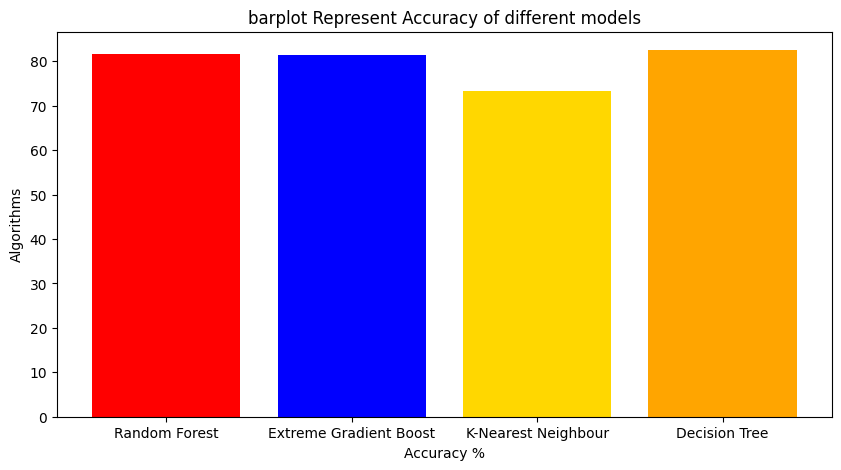

In [36]:
import matplotlib.pyplot as plt
colors = ['red','blue','gold','orange']
plt.figure(figsize=(10,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()